# Jogo da Velha

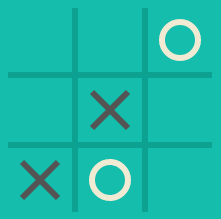

In [261]:
# Ricardo da Rocha ricardodarocha@outlook.com
from IPython.display import Image
Image(filename="D:\python\jupyter\\nBoard\\tictactoe.png", width=300)


Definimos um jogo da velha como uma matriz $3×3$

In [252]:
mat = [(i+1, j+1) for i in range(3) for j in range(3)]
def col(x): return mat[x][0]
def lin(x): return mat[x][1]

Com as colunas e as linhas variando de $1$ a $3$ podemos obter um mapa das coordenadas

In [253]:
print(mat)

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]


Nós podemos calcular qualquer casa a partir das coordenadas $i×j$ *tal que* $ i =[1..3],  j =[1..3]$

Representamos com os valores $[0..8]$ cada casa do tabuleiro de jogo da velha

In [254]:
def casa(i, j): return j+3*i

for i in range(3):
    for j in range(3):
        print(casa(i,j), end='')

012345678

dada uma **str** que represente um tabuleiro de jogo da velha, podemos formatar esta str de $3$ em $3$

In [255]:
def quebratexto(texto, tamanho = 3, separador='|'):
    res = ''
    for x in range(len(texto)):
        if x % (tamanho) == 0:
            res += separador+texto[x]
        else:
            res += texto[x]
    return res #+ separador

str = '❌⭕⬜⬜❌⬜⬜❌⬜'
strf = quebratexto(str, 3, '\n')
print(strf)


def substituir(index, entrada='❌'):
    res = ''
    for i in range(9):
        res += entrada if i == index else str[i]
    return res


❌⭕⬜
⬜❌⬜
⬜❌⬜


# Calculando o vencedor

Concatenando a matriz em diferentes posições podemos encontrar o vencedor

Primeiro vamos analisar as linhas,
em seguida as colunas e por último as diagonais.

In [259]:
def solve(astr):
    verlinhas, vercolunas, verdiagonais = '', '', ''

    for k in range(9):
        verlinhas += astr[casa(col(k)-1, lin(k)-1)]
        vercolunas += astr[casa(lin(k)-1, col(k)-1)]
        if col(k) == lin(k):
            verdiagonais = astr[k] + verdiagonais
        if 4-col(k) == lin(k):
            verdiagonais += astr[k]

    return format(f'{verlinhas}{vercolunas}{verdiagonais}')

def winner(astr):
    res = ''
    res = solve(astr)
    res = quebratexto(res, separador='◾')

    for character in ['❌', '⭕']:
        if res.find('◾'+character*3) % 4 == 0:
            return character

    return '⬜'

print(solve(str))

❌⭕⭕❌❌⭕❌⭕⬜❌❌❌⭕❌⭕⭕⭕⬜⬜❌❌⭕❌❌


In [260]:
import os, random

def reiniciar(): return '⬜'*9
def desenhar(astr):
    os.system('cls')
    print(quebratexto(astr, 3, '\n'))

def humanojoga(astr):
    alfa = int(input(quebratexto('1️⃣2️⃣3️⃣4️⃣5️⃣6️⃣7️⃣8️⃣9️⃣', separador='\n')))
    if astr[alfa-1] != '⬜':
        print(f'invalid {alfa}')
        return humanojoga(astr)
    astr = substituir(alfa-1)
    return astr

def computadorjoga(astr):
    if astr.find('⬜') == -1:
        return astr
    while True:
        alfa = random.randrange(9)
        if astr[alfa] != '⬜':
            continue;
        astr = substituir(alfa, '⭕')
        desenhar(astr)
        return (astr)

str = reiniciar()
desenhar(str)

while True:
    str = humanojoga(str)
    str = computadorjoga(str)
    w = winner(str)
    if w != '⬜':
        person = '🥳' if w == '❌' else '🤯'
        print(f'\n\n{person}\n{w} venceu')
        break




⬜⬜⬜
⬜⬜⬜
⬜⬜⬜

⬜⬜⭕
⬜⬜⬜
⬜⬜❌

⬜⬜⭕
⭕❌⬜
⬜⬜❌

⭕❌⭕
⭕❌⬜
⬜⬜❌
invalid 1

⭕❌⭕
⭕❌❌
⭕⬜❌


🤯
⭕ venceu
